# Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Data Overview

In [2]:
#import the libraries 
car = pd.read_csv("austo_automobile+%282%29+%281%29.csv")

In [19]:
car.shape ##there are 1581 rows and 14 columns

(1581, 14)

### Structure of the Data 

In [7]:
car.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [56]:
#Statstical Summary
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


### Types of the Data 

In [9]:
print("\nData Types:")
print(car.dtypes)


Data Types:
Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


### Check for and treat (if needed) missing values

In [11]:
print("\nMissing Value:")
print(car.isnull().sum())


Missing Value:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [4]:
#Missing Values

car['Partner_salary'].isnull().sum()

106

Lets Start with treating the missing value and anomalies of gender

In [7]:
car['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [8]:
def remove_anomalies(row):
    if row['Gender'] == 'Male':
        return 'Male'
    elif row['Gender'] == 'Femal':
        return 'Female'
    elif row['Gender'] == 'Female':
        return 'Female'
    elif row['Gender'] == 'Femle':
        return 'Female'
    elif row['Gender'] == 'nan':
        return 'nan'
    else:
        return row['Gender']

In [9]:
car['Gender'] = car.apply (remove_anomalies,axis =1)

In [10]:
car['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
car['Gender'] = car['Gender'].fillna(method='pad')

In [12]:
car.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

    
### We have missing values in the feature Partner_salary so lets fill this with mean 

<Axes: xlabel='Partner_salary'>

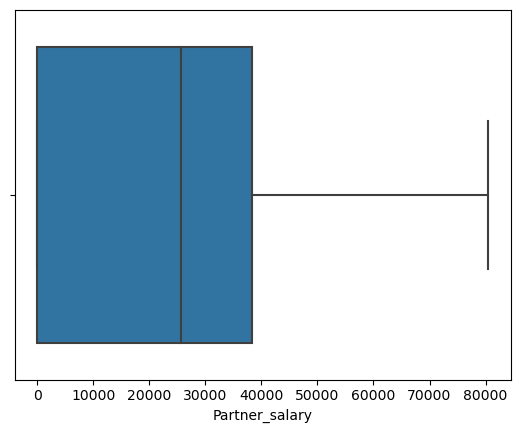

In [3]:
sns.boxplot(x='Partner_salary',data= car)

In [5]:
car.Partner_salary.fillna(car.Partner_salary.mean(),inplace=True)

In [13]:
car.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [16]:
#Lets check for duplicates

dups = car.duplicated()
print("No of duplicate rows = %d" % (dups.sum()))

No of duplicate rows = 0


In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


<Axes: xlabel='Salary'>

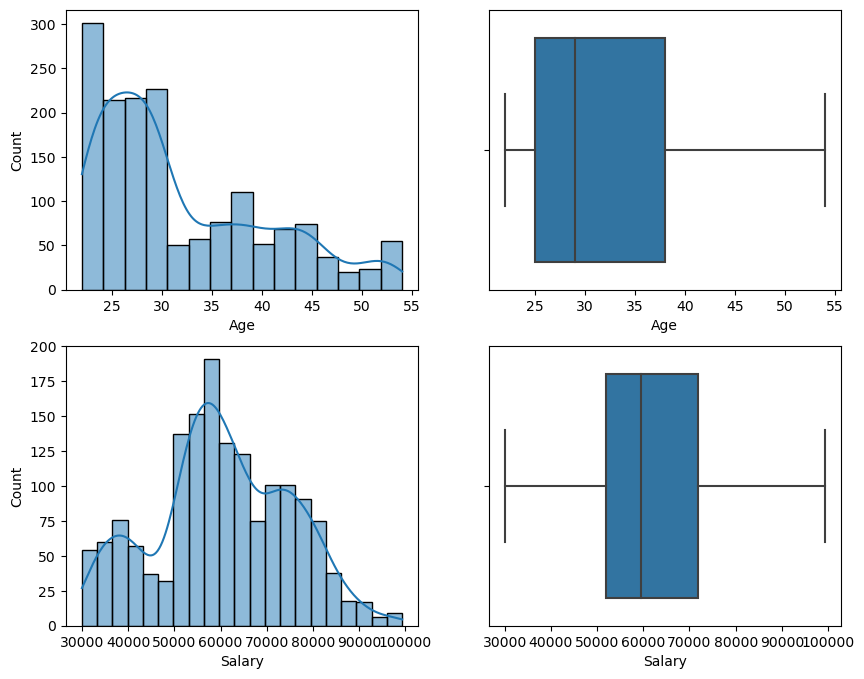

In [18]:
fig,axes=plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.histplot(car['Age'],kde = True ,ax=axes[0][0])
sns.boxplot(x='Age',data = car,ax=axes[0][1])
sns.histplot(car['Salary'],kde = True,ax=axes[1][0])
sns.boxplot(x='Salary',data = car,ax=axes[1][1])

### There are no Outliers present in the features age and salary  

<Axes: xlabel='Total_salary'>

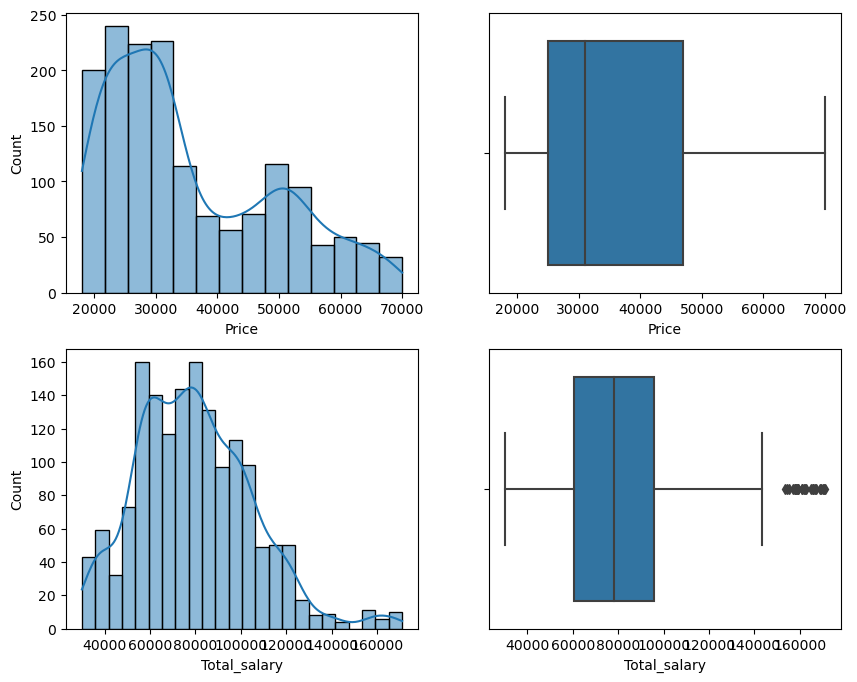

In [19]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.histplot(car['Price'],kde = True,ax=axes[0][0])
sns.boxplot(x='Price',data=car,ax=axes[0][1])
sns.histplot(car['Total_salary'],kde = True,ax=axes[1][0])
sns.boxplot(x="Total_salary",data = car,ax=axes[1][1])

<Axes: xlabel='Partner_salary'>

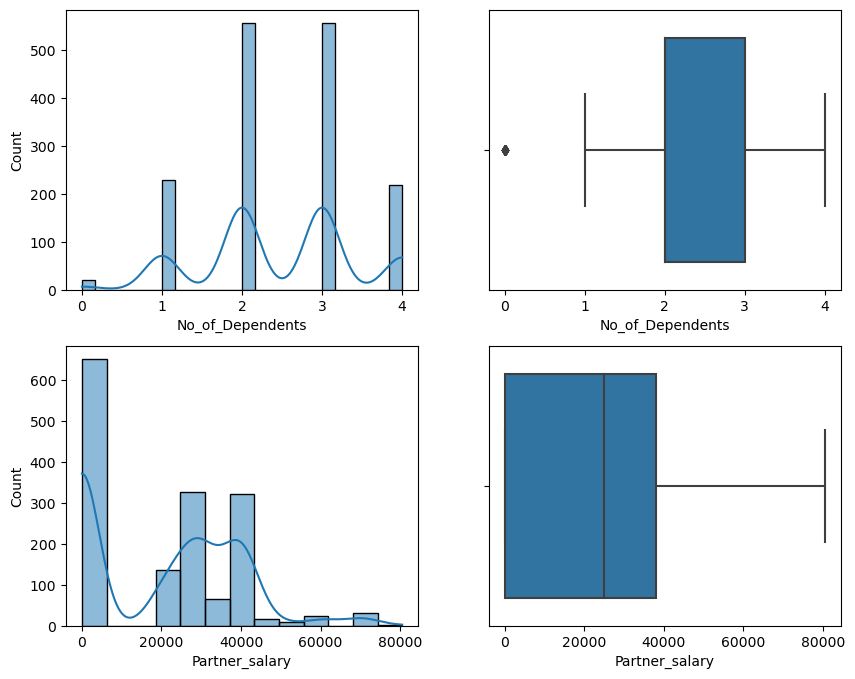

In [20]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.histplot(car['No_of_Dependents'],kde = True,ax=axes[0][0])
sns.boxplot(x='No_of_Dependents',data=car,ax=axes[0][1])
sns.histplot(car['Partner_salary'],kde = True,ax=axes[1][0])
sns.boxplot(x='Partner_salary',data=car,ax=axes[1][1])

In [21]:
car['Make'].value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

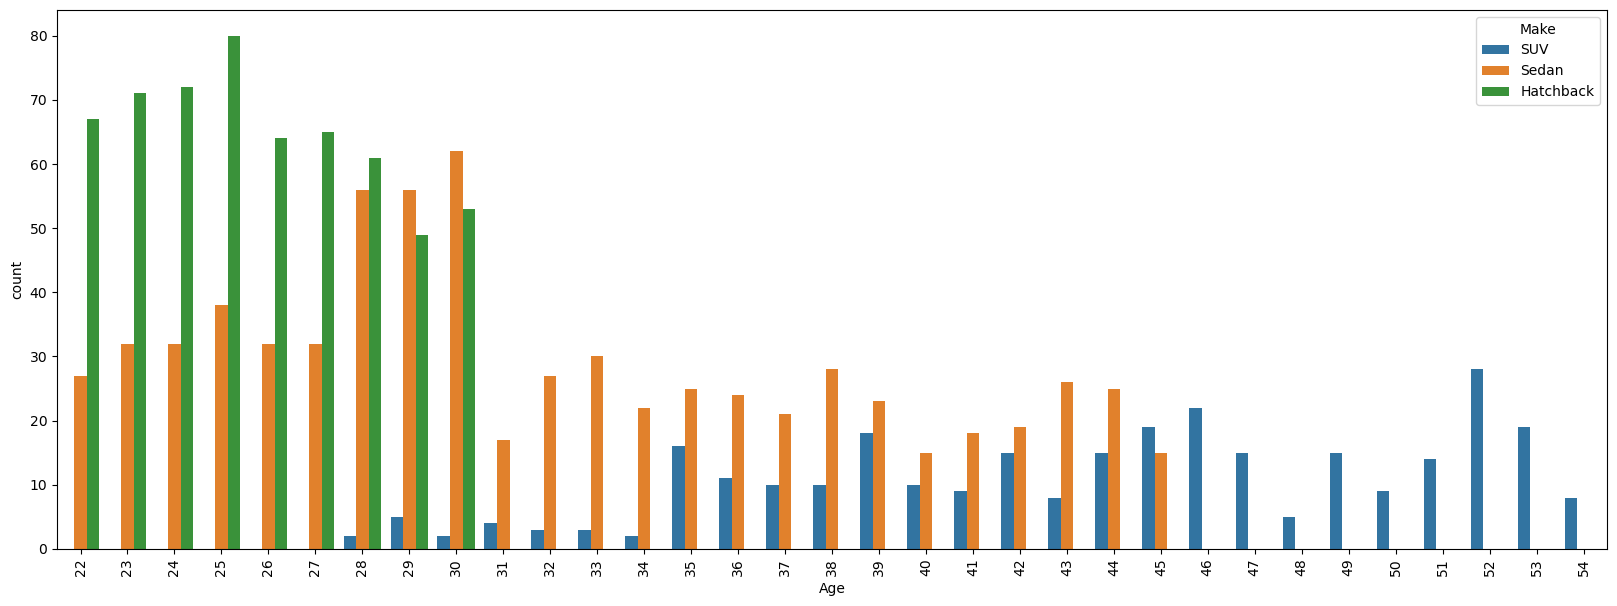

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x='Age',data=car,hue='Make')
plt.xticks(rotation=90);

### "This shows that more people aged 26 are purchasing hatchbacks."

<Axes: xlabel='Age', ylabel='Price'>

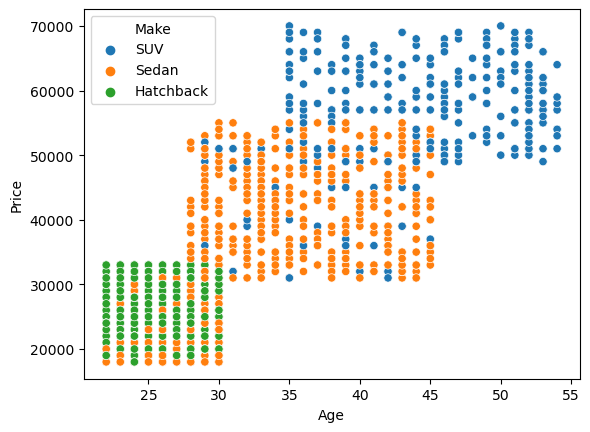

In [23]:
sns.scatterplot(x='Age',y='Price',hue='Make',data = car)

<Axes: xlabel='Gender', ylabel='count'>

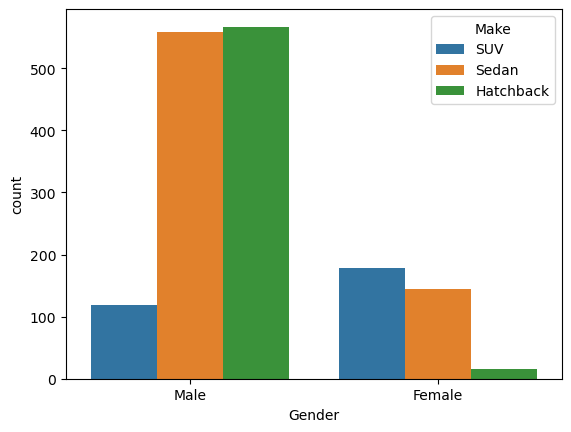

In [24]:
sns.countplot(x='Gender',hue ='Make',data=car)

In [25]:
pd.crosstab(car['Gender'],car['Make'],margins=True,normalize=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.112587,0.091082,0.213156
Male,0.358634,0.075269,0.352941,0.786844
All,0.368121,0.187856,0.444023,1.000000


### 44% of the customers tend to buy Sedan

<Axes: xlabel='Make', ylabel='Total_salary'>

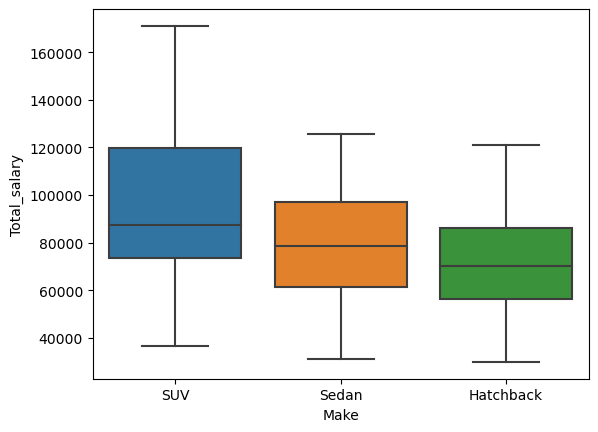

In [26]:
fig_dims=(12,5)
sns.boxplot(x='Make',y='Total_salary',data=car)

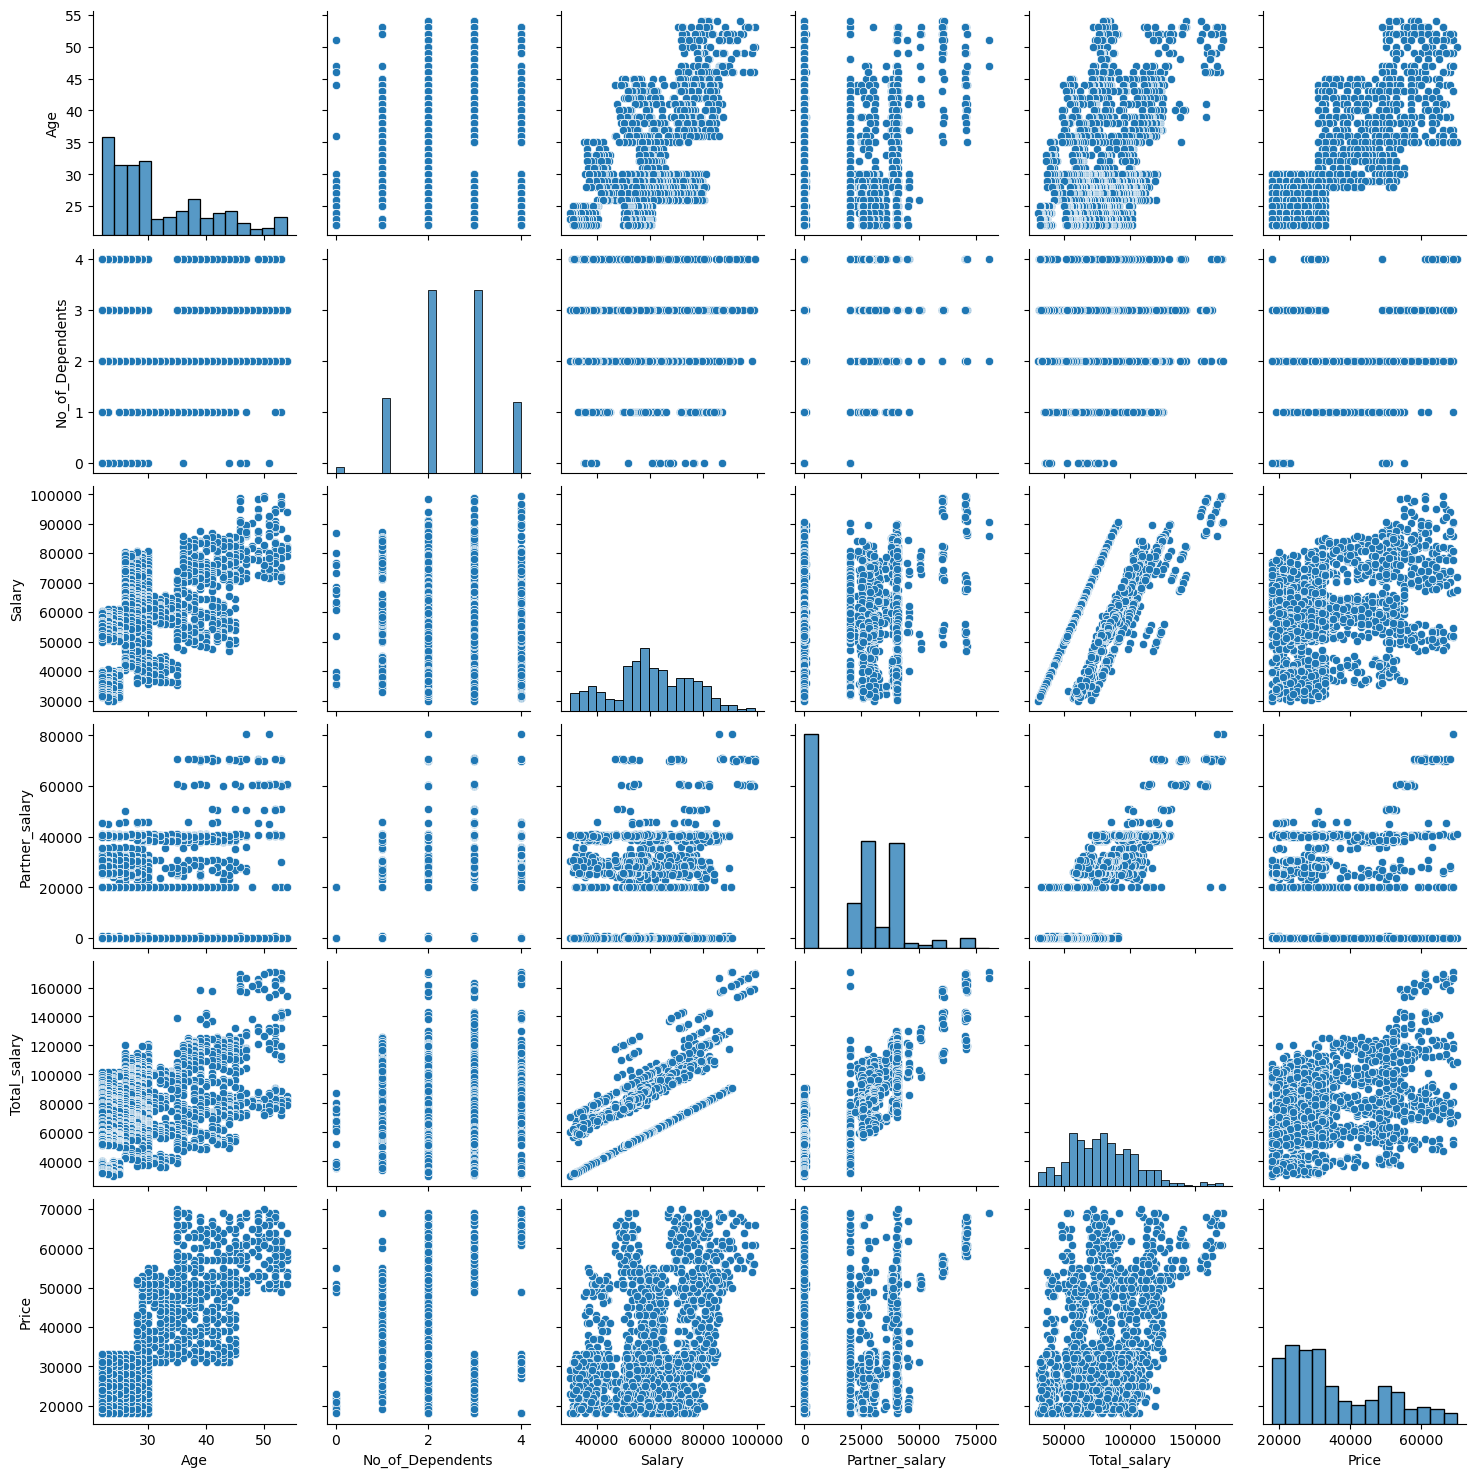

In [27]:
sns.pairplot(car)

C:\Users\suraj\AppData\Local\Temp\ipykernel_14064\163433038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(),annot=True,fmt='.2f');


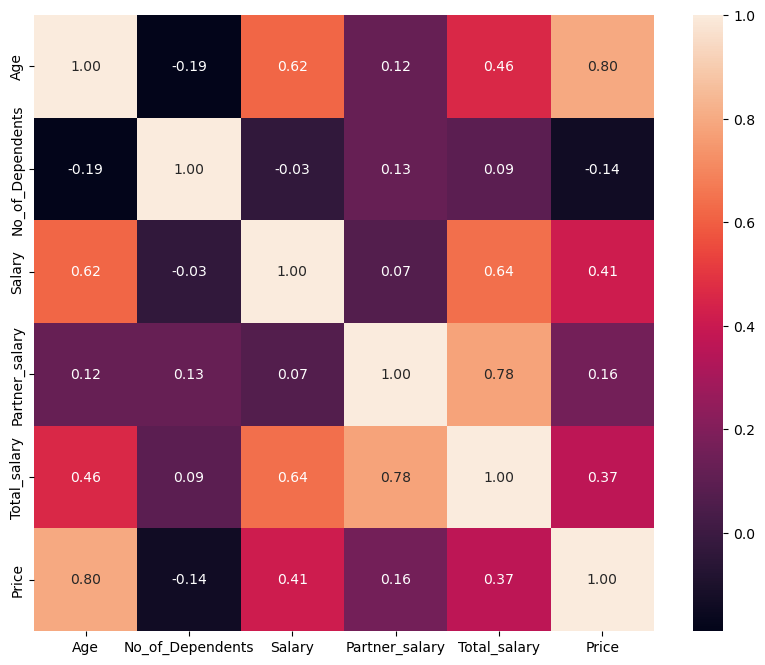

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(car.corr(),annot=True,fmt='.2f');

### There is strong correlation between few fields and weak correlation between few fields

<Axes: xlabel='Age', ylabel='Personal_loan'>

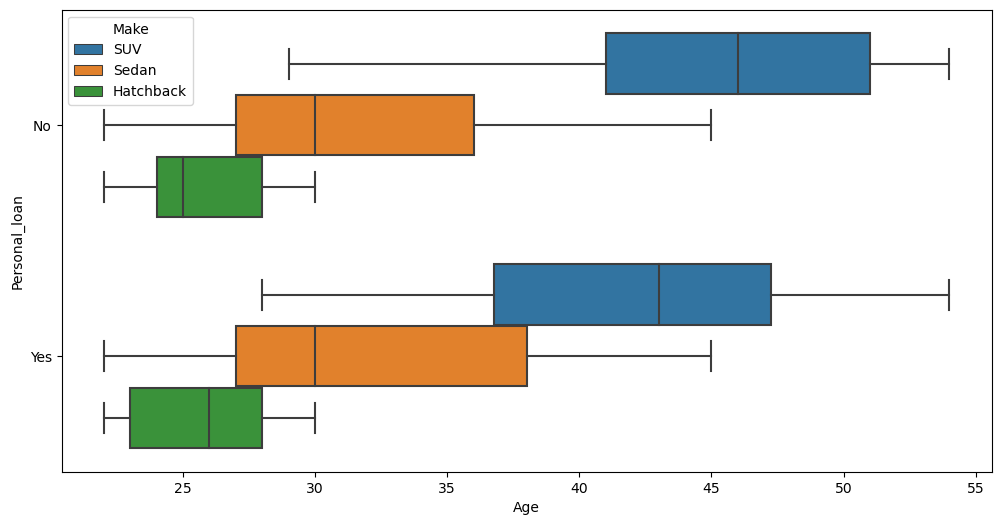

In [30]:
fig_dims = (12,6)
fig=plt.subplots(figsize=fig_dims)
sns.boxplot(x='Age',y='Personal_loan',hue='Make',data=car)

### Median age of who have not taken personal loan is higher than the customer who have taken the loan  

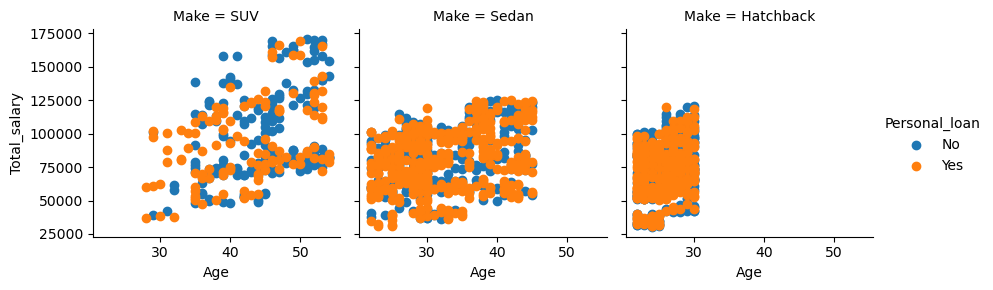

In [31]:
g=sns.FacetGrid(car,col='Make',hue = 'Personal_loan',col_wrap=3,height=3)
g=g.map(plt.scatter,'Age','Total_salary')
g.add_legend()

<Axes: xlabel='Total_salary'>

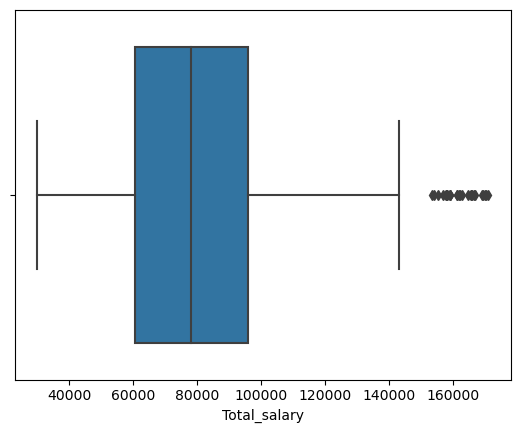

In [32]:
sns.boxplot(x='Total_salary',data=car)

In [34]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,(25,75))
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

lr,ur=detect_outlier(car['Total_salary'])
print(lr,ur)

7400.0 149000.0


In [35]:
car['Total_salary']=np.where(car['Total_salary']>ur,ur,car['Total_salary'])
car['Total_salary']=np.where(car['Total_salary']<lr,lr,car['Total_salary'])

<Axes: xlabel='Total_salary'>

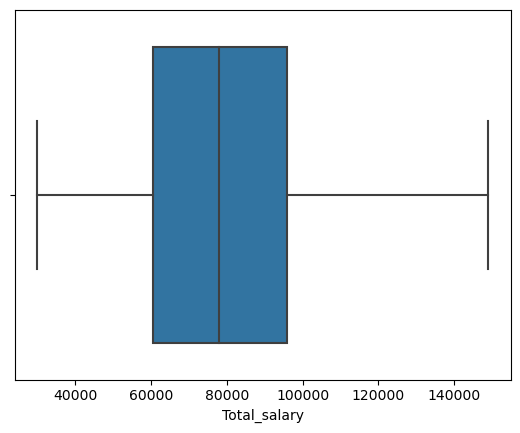

In [36]:
sns.boxplot(x='Total_salary',data=car)

In [3]:
car['No_of_Dependents'].value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

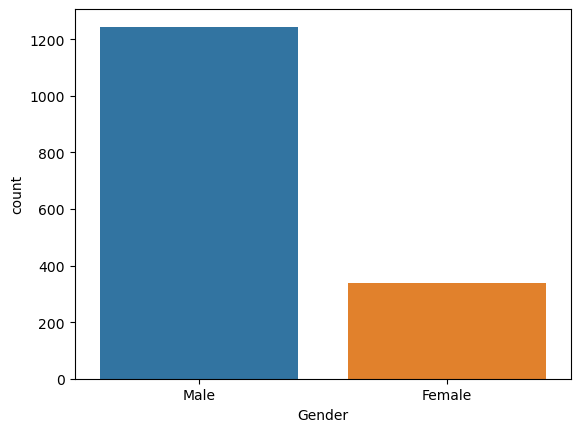

In [37]:
sns.countplot(x='Gender',data=car)

<Axes: xlabel='Marital_status', ylabel='count'>

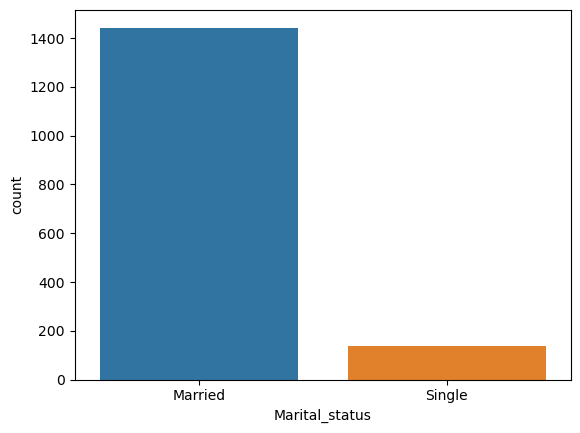

In [38]:
sns.countplot(x='Marital_status',data = car)

<Axes: xlabel='Marital_status', ylabel='count'>

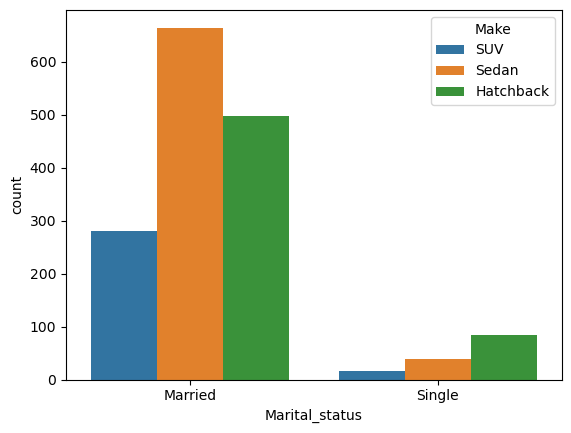

In [39]:
sns.countplot(x='Marital_status',hue='Make',data=car)

<Axes: xlabel='Profession', ylabel='count'>

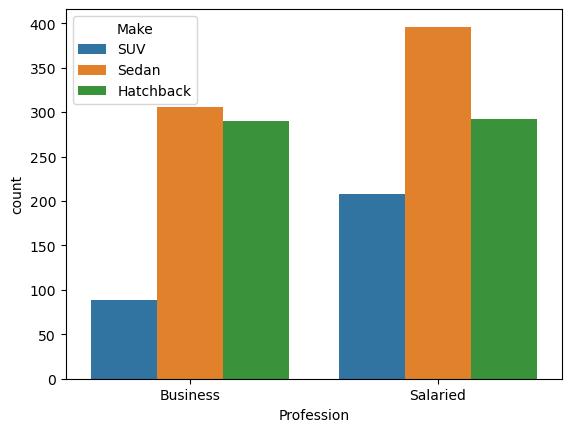

In [40]:
sns.countplot(x='Profession',hue='Make',data=car)

<Axes: xlabel='Education', ylabel='count'>

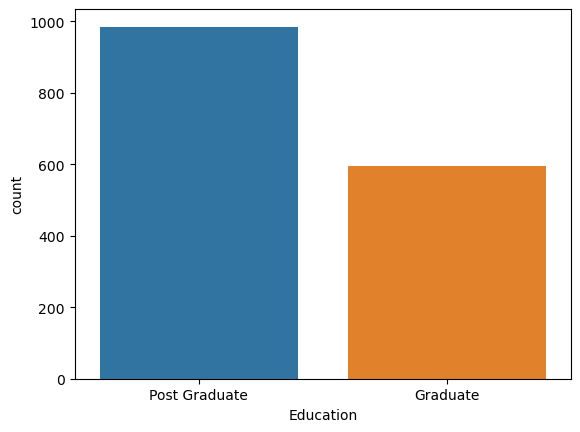

In [41]:
sns.countplot(x='Education',data=car)

<Axes: xlabel='House_loan', ylabel='count'>

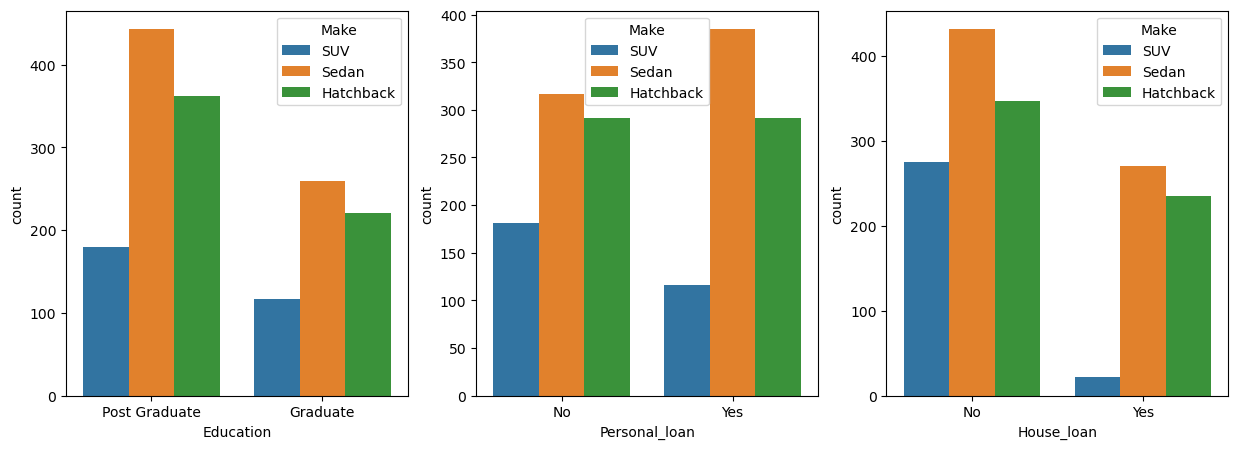

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x='Education',data=car,hue='Make')
plt.subplot(1,3,2)
sns.countplot(x='Personal_loan',data=car,hue='Make')
plt.subplot(1,3,3)
sns.countplot(x='House_loan',data=car,hue='Make')

<Axes: xlabel='Make', ylabel='count'>

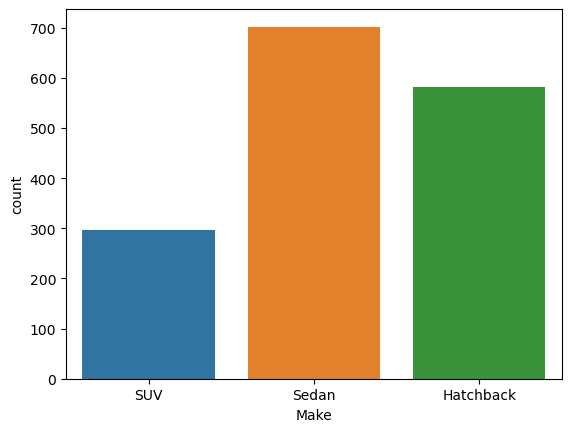

In [43]:
sns.countplot(x='Make',data = car)

In [44]:
car.groupby(['Make'])["Price"].mean()

Make
Hatchback    26474.226804
SUV          55824.915825
Sedan        34603.988604
Name: Price, dtype: float64

<Axes: xlabel='Salary', ylabel='Price'>

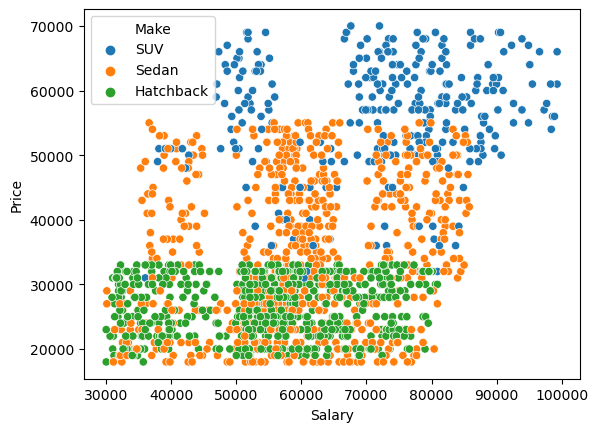

In [45]:
sns.scatterplot(x="Salary",y="Price",hue='Make',data = car)

<Axes: xlabel='Age', ylabel='count'>

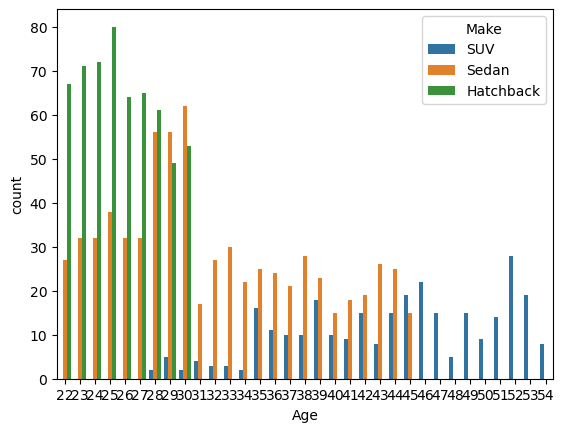

In [46]:
sns.countplot(x='Age',data=car,hue='Make')

In [47]:
car.groupby(['Profession','Make']).Gender.value_counts()

Profession  Make       Gender
Business    Hatchback  Male      290
            SUV        Female     56
                       Male       33
            Sedan      Male      256
                       Female     50
Salaried    Hatchback  Male      277
                       Female     15
            SUV        Female    122
                       Male       86
            Sedan      Male      302
                       Female     94
Name: Gender, dtype: int64

In [48]:
car.groupby(['Gender','Profession']).Make.value_counts()

Gender  Profession  Make     
Female  Business    SUV           56
                    Sedan         50
        Salaried    SUV          122
                    Sedan         94
                    Hatchback     15
Male    Business    Hatchback    290
                    Sedan        256
                    SUV           33
        Salaried    Sedan        302
                    Hatchback    277
                    SUV           86
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

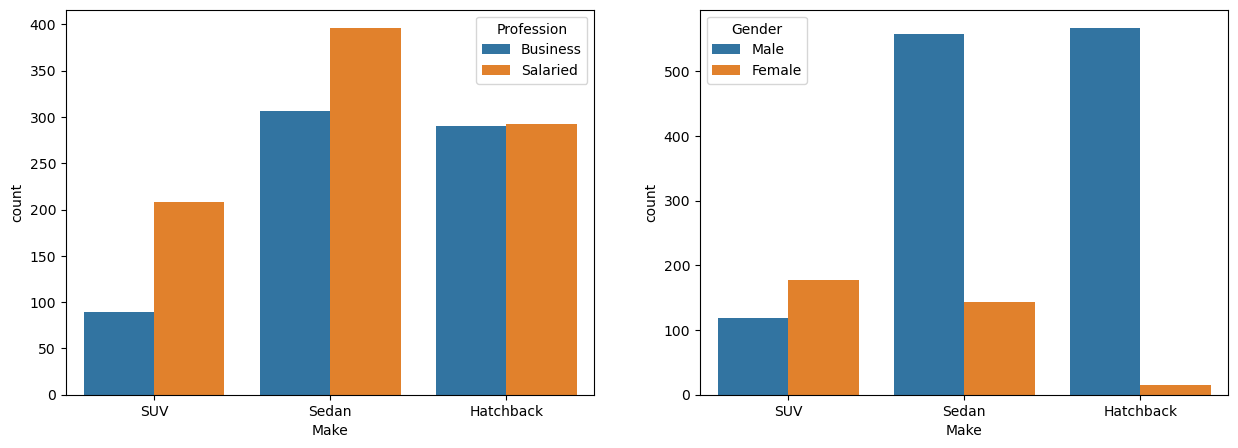

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Make',data=car,hue='Profession')
plt.subplot(1,2,2)
sns.countplot(x='Make',data=car,hue='Gender')

<Axes: xlabel='Make', ylabel='Count'>

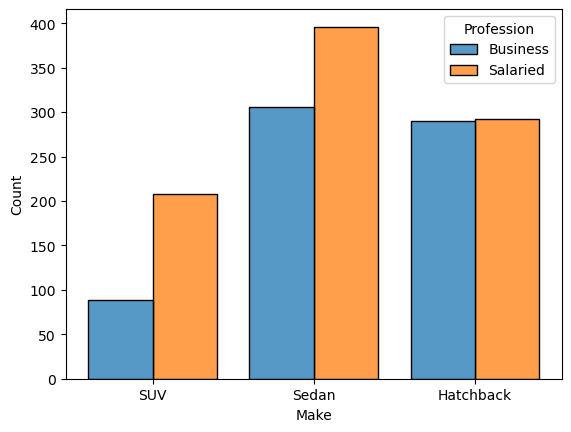

In [67]:
sns.histplot(x='Make',data=car,hue='Profession',multiple='dodge',shrink=.8)

### We can observe that salaried professional are likely to buy SUV and Sedan by a large margin than a Business Professionals .We can also observe that Hatchback cars are equally bought by Salaried and Business Professionals 

<Axes: xlabel='Gender', ylabel='Price'>

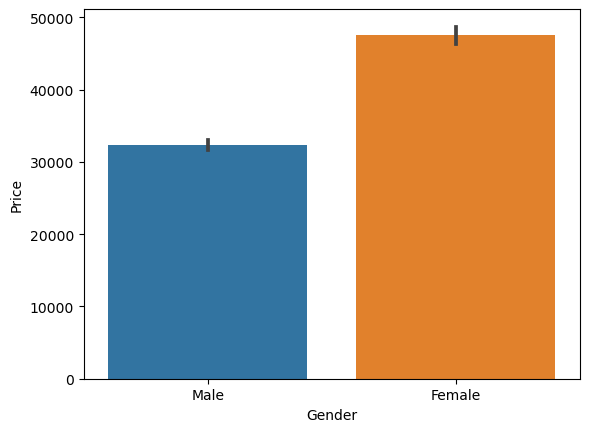

In [51]:
sns.barplot(data=car,x='Gender',y='Price')

<Axes: xlabel='Personal_loan', ylabel='Price'>

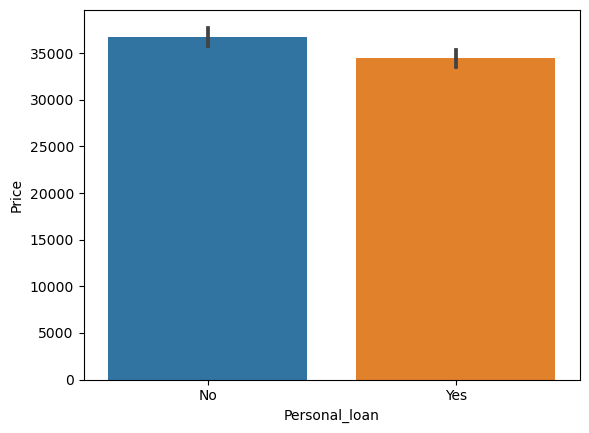

In [52]:
sns.barplot(data=car,x='Personal_loan',y='Price')

In [53]:
car['Gender'].value_counts()

Male      1244
Female     337
Name: Gender, dtype: int64

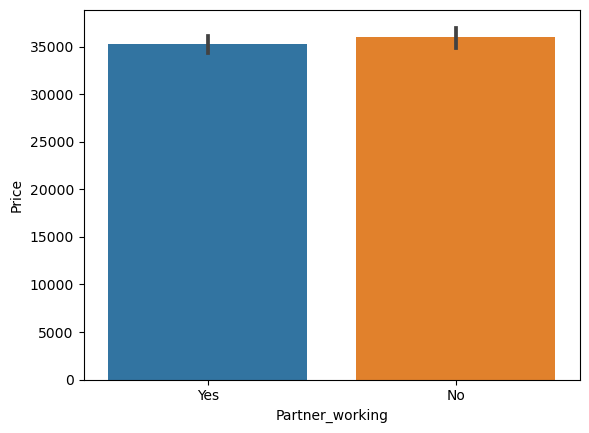

In [54]:
sns.barplot(data=car,x='Partner_working',y='Price')
plt.show()

In [56]:
pd.crosstab(car['Gender'],car['Make'],margins=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,178,144,337
Male,567,119,558,1244
All,582,297,702,1581


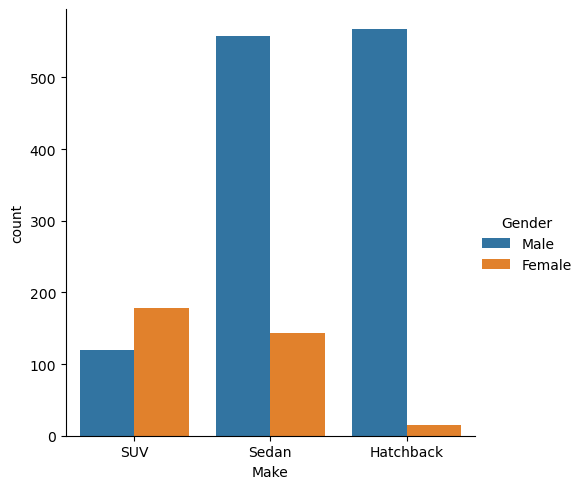

In [57]:
sns.catplot(data=car,x='Make',hue='Gender',kind='count')

<Axes: xlabel='Make', ylabel='count'>

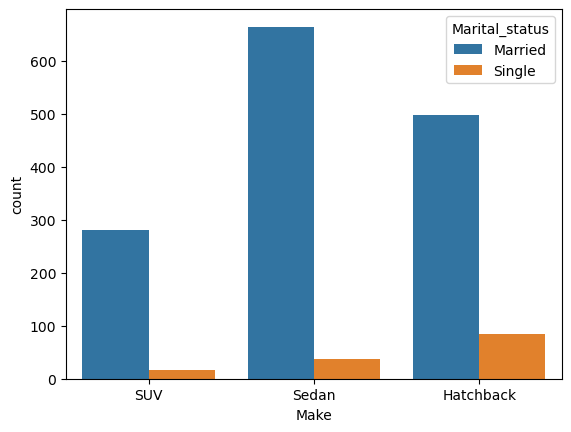

In [58]:
sns.countplot(x='Make',data=car,hue='Marital_status')

In [59]:
pd.crosstab(car['Marital_status'],car['Make'],margins=True)

Make,Hatchback,SUV,Sedan,All
Marital_status,,,,
Married,498,281,664,1443
Single,84,16,38,138
All,582,297,702,1581


In [65]:
cols=['Profession','Make','Gender']
car.groupby(cols)[cols].count()

Profession  Make  Gender
Profession Make      Gender                          
Business   Hatchback Male           290   290     290
           SUV       Female          56    56      56
                     Male            33    33      33
           Sedan     Female          50    50      50
                     Male           256   256     256
Salaried   Hatchback Female          15    15      15
                     Male           277   277     277
           SUV       Female         122   122     122
                     Male            86    86      86
           Sedan     Female          94    94      94
                     Male           302   302     302

In [60]:
car['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status', ylabel='count'>

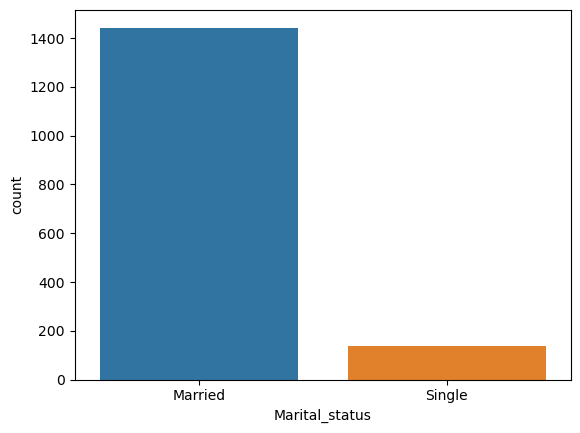

In [61]:
sns.countplot(x='Marital_status',data=car)

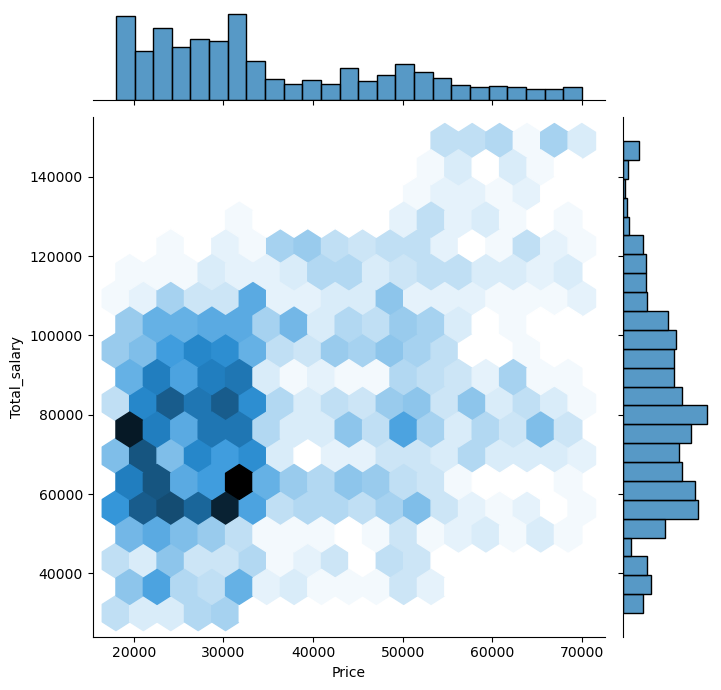

In [68]:
sns.jointplot(data=car,x='Price',y='Total_salary',kind='hex',height=7, marginal_kws=dict(bins=25,fill = True))

### People with Total salary between 60000 to 100000 are the most number of buyers and also they buy in the lowest category 20000 to 40000 category 

<Axes: xlabel='Make', ylabel='Total_salary'>

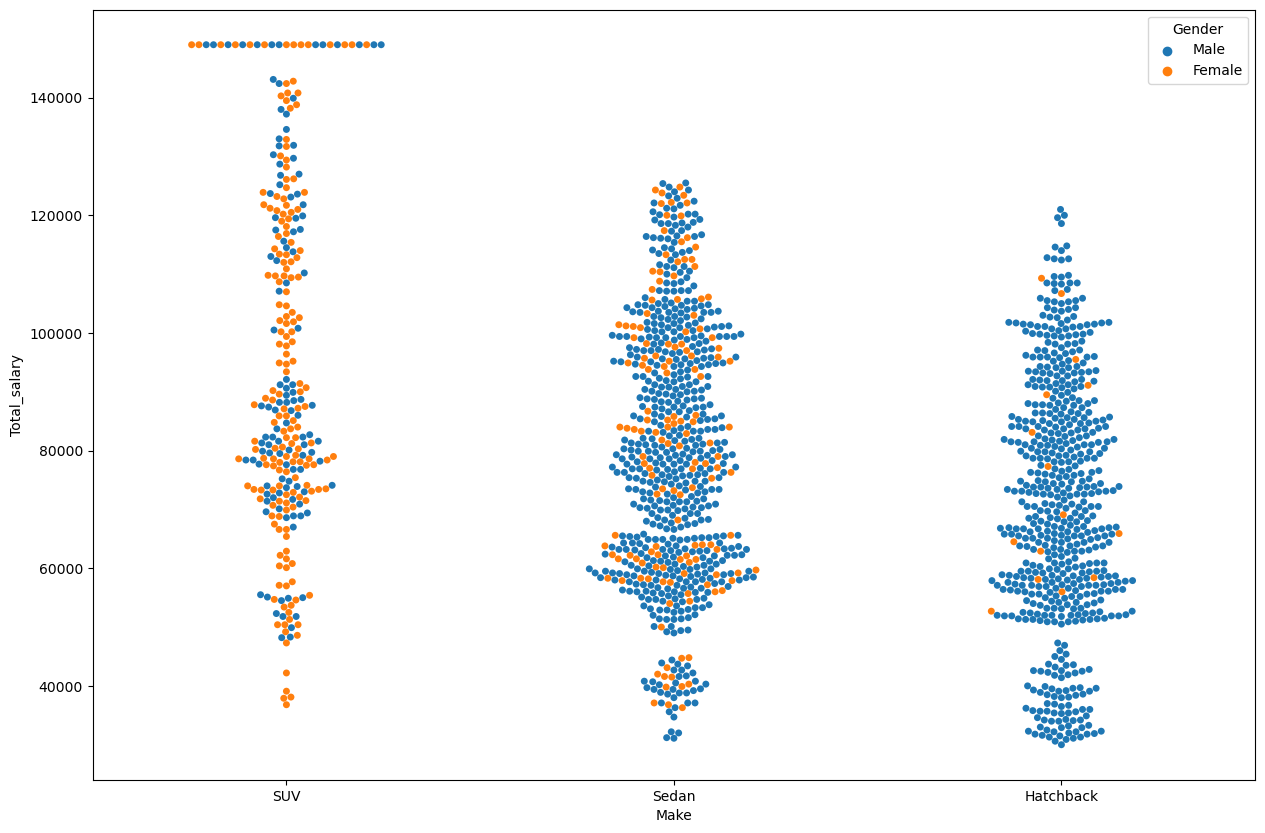

In [69]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=car,x='Make',y='Total_salary',hue='Gender')
#sns.implot(data=car, y = 'Total_salary',x='Price',hue='Make',height=12)

### SUVs are more likely to be bought by Female than Male population and Sedan and Hatchback are bought more by Male and Female Population

### The very little population which has high salary prefer to buy SUV than Sedan and Hatchback and population with Medium to low salary prefer to buy Sedan and Hatchback 

## Problem 2

### Framing an Analytics Problem - Analyse the dataset and list down the top 5 important Variables ,along with the Business Justifications 

In [72]:
df = pd.read_excel('godigt_cc_data.xlsx', engine = 'openpyxl')
df.head(10)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
5,6,5241 78XX XXXX XXXX,524178,Mastercard,cashback,2015-01-28,E,0,0,1,...,13,0,0,0,0,0,R,44515,Retired,50000
6,7,4055 33XX XXXX XXXX,405533,Visa,cashback,2013-11-08,E,1,1,1,...,9,0,0,0,0,0,T,15779,Retired,20000
7,8,4375 51XX XXXX XXXX,437551,Visa,edge,2014-12-27,B,0,1,1,...,60,0,0,0,0,0,T,40290,Salaried,260000
8,9,4377 48XX XXXX XXXX,437748,Visa,cashback,2015-07-15,D,0,0,1,...,43,0,0,0,0,0,T,56123,Housewife,120000
9,10,4386 28XX XXXX XXXX,438628,Visa,shoprite,2000-09-20,D,0,0,0,...,10,0,0,0,0,0,T,9453,Salaried,80000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [77]:
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [79]:
df['Transactor_revolver'] = df['Transactor_revolver'].fillna(method = 'pad')

In [80]:
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


<Axes: xlabel='card_type', ylabel='avg_spends_l3m'>

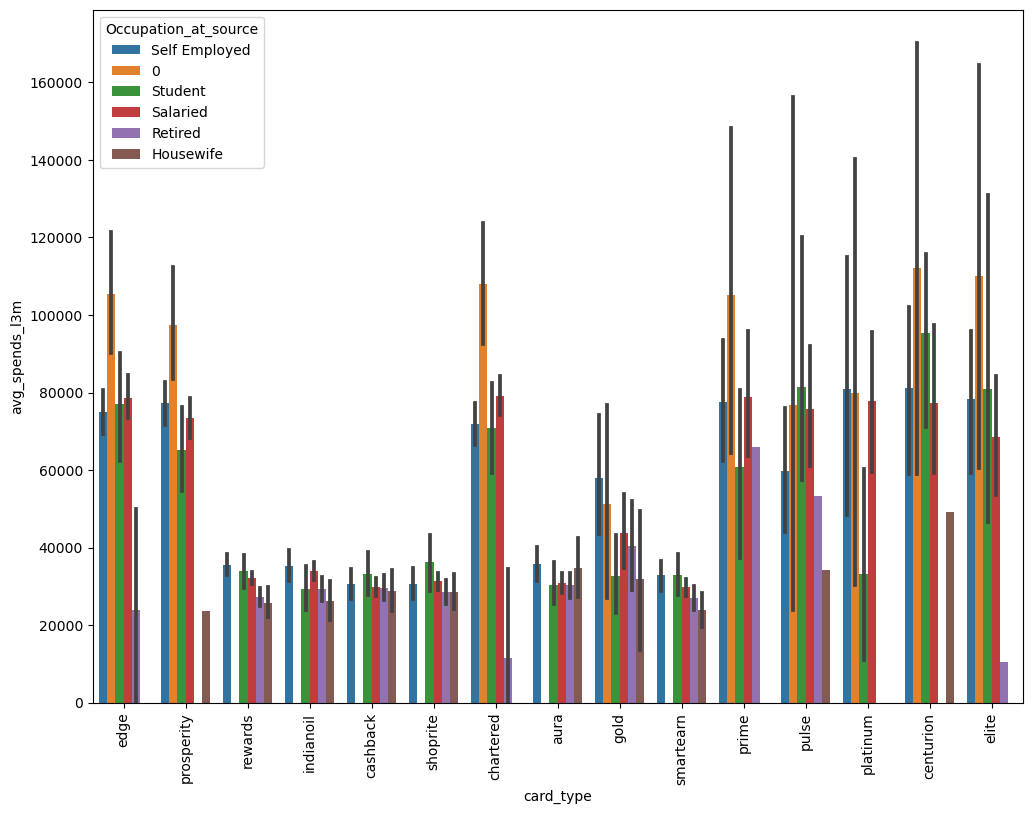

In [82]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data = df,x='card_type', y='avg_spends_l3m',hue = 'Occupation_at_source')

<Axes: xlabel='other_bank_cc_holding', ylabel='avg_spends_l3m'>

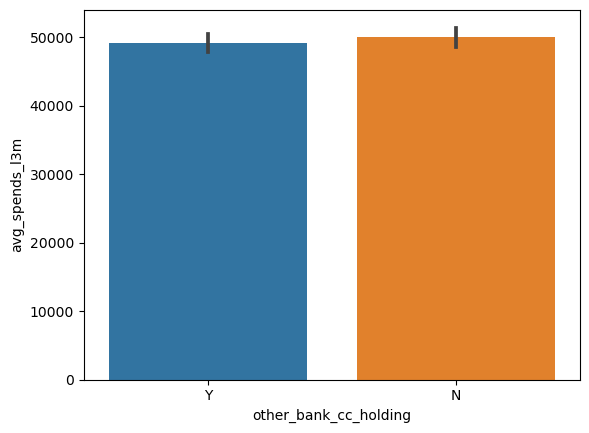

In [84]:
sns.barplot(data=df,x='other_bank_cc_holding', y='avg_spends_l3m')

<Axes: xlabel='Transactor_revolver', ylabel='count'>

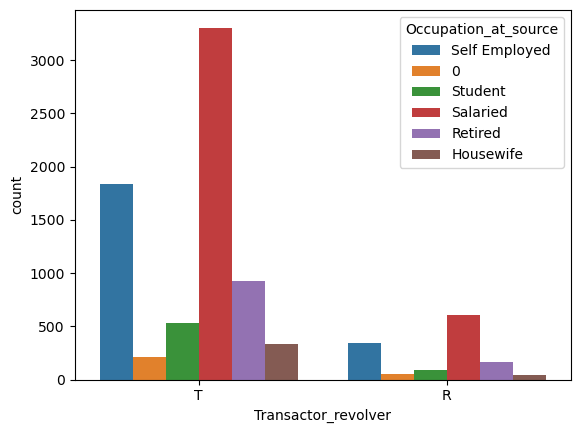

In [85]:
sns.countplot(data=df,x='Transactor_revolver',hue = 'Occupation_at_source')

<Axes: xlabel='cc_limit', ylabel='avg_spends_l3m'>

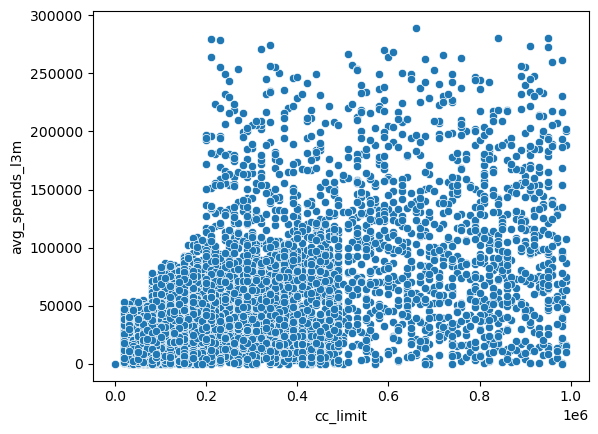

In [86]:
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m')

<Axes: xlabel='Issuer', ylabel='count'>

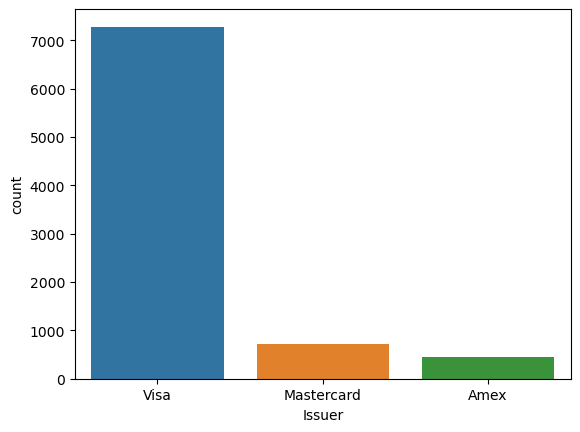

In [87]:
sns.countplot(data=df,x='Issuer')

<Axes: xlabel='Occupation_at_source', ylabel='count'>

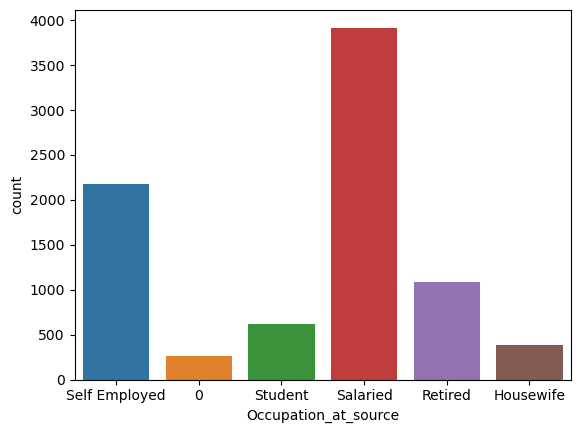

In [88]:
sns.countplot(data=df,x='Occupation_at_source')

<Axes: xlabel='annual_income_at_source', ylabel='avg_spends_l3m'>

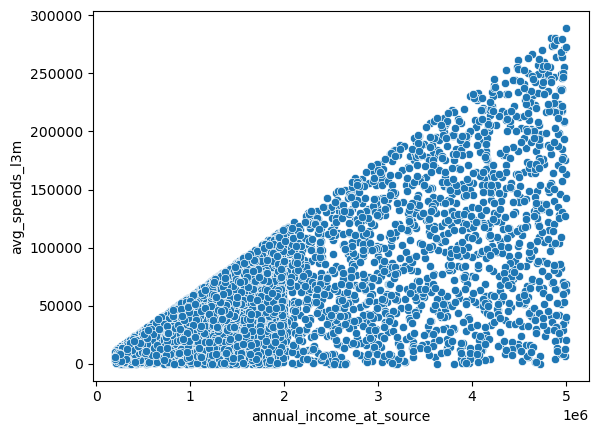

In [89]:
sns.scatterplot(data=df,x='annual_income_at_source', y='avg_spends_l3m')

<Axes: xlabel='widget_products'>

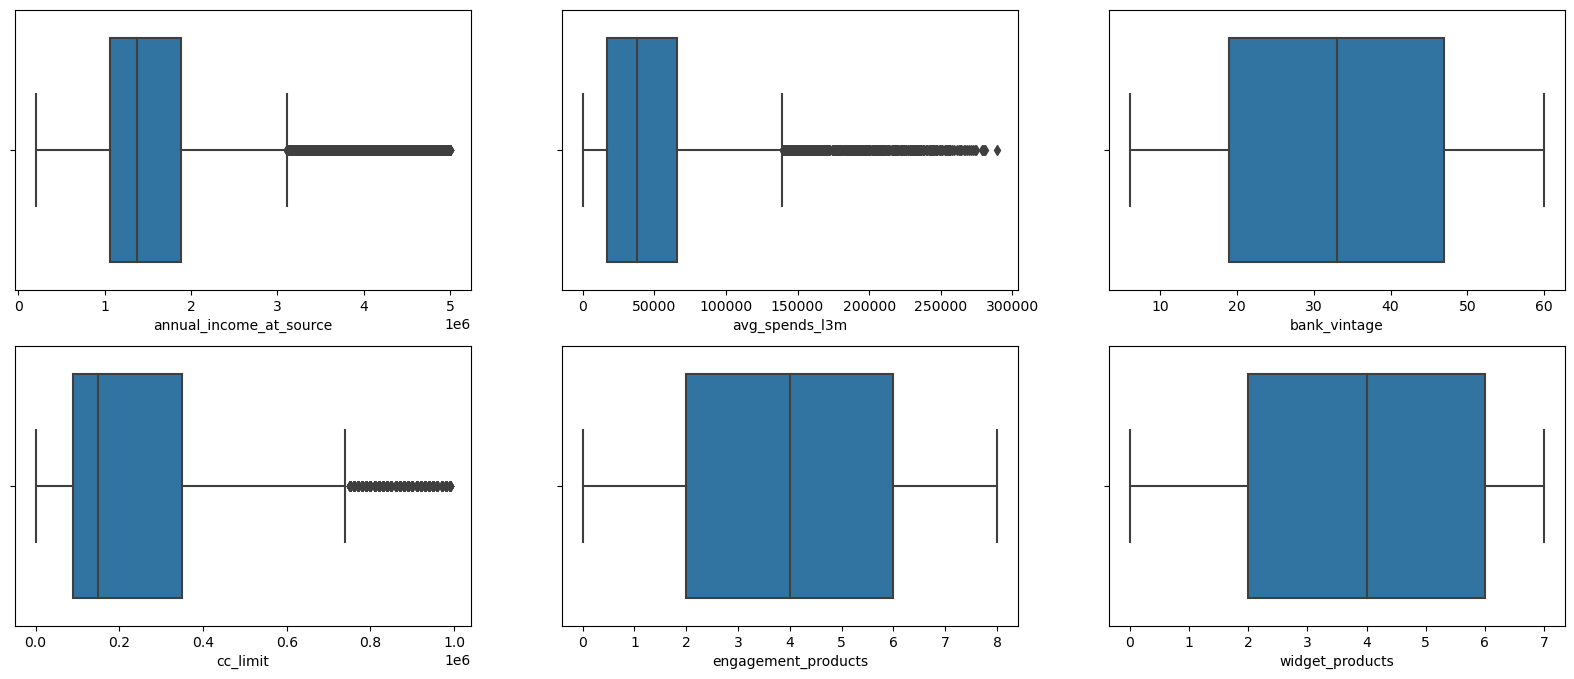

In [91]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,8))
sns.boxplot(x='annual_income_at_source',data=df,ax=axes[0][0])
sns.boxplot(x='avg_spends_l3m',data=df,ax=axes[0][1])
sns.boxplot(x='bank_vintage',data=df,ax=axes[0][2])
sns.boxplot(x='cc_limit',data=df,ax=axes[1][0])
sns.boxplot(x='engagement_products',data=df,ax=axes[1][1])
sns.boxplot(x='widget_products',data=df,ax=axes[1][2])